# INTRODUCTION

This analysis is to examine if any correlation exists between Christopher Walken's movie career and use of cowbell in popular music.

Most internet searches of "Best SNL Sketch" will include "More Cowbell" somewhere on their list, if not at the number one spot.[(source)](https://www.eonline.com/news/1140387/ranking-the-best-saturday-night-live-sketches-of-all-time) Airing on April 8, 2000, it very quickly became a pop culture phenomenon.[(source)](https://www.vanityfair.com/hollywood/2019/11/more-cowbell-ruined-christopher-walkens-life-will-ferrell-claims) 

You can watch the sketch [here](https://www.youtube.com/watch?v=cVsQLlk-T0s).

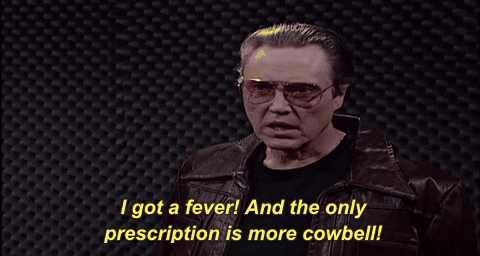

In [26]:
from IPython.display import Image
Image(filename = "./walken.gif")

with open('walken.gif', 'rb') as f:
   display(Image(data = f.read(), format = 'png'))

# METHODOLOGY

## Collect Data

### Christopher Walken's Film Career

The website https://www.rottentomatoes.com/celebrity/christopher_walken was accessed on 10/13/2021. The film list was not so large that it was necessary to use other tools to collect information, so the list was transferred to a spreadsheet, fields with "No Score Yet" or a "-" in the Box Office revenue were deleted. 

### Cowbell Songs

**UltimateCowbell.com**

The best resource with complete listings of cowbell songs was http://ultimatecowbell.com. Smaller lists are available with a much smaller sample size, typically ranging from 10-12 songs. Much more data was needed to determine any patterns that may occur. Note: Some of these entries have explicit language.

Also, the year each song was published would be required to plot correctly against Walken's career. UltimateCowbell only provided the song details with the year as a separate page per song ([see example here](http://ultimatecowbell.com/songview.php?idsongperm=718)). Since the site had well over 4000 entries, the easiest method was to create a web scraper, move the information to a database and write a CSV. The code for the web scraper can be found in `cowbell.py`. Website accessed on 10/14/2021.

**RollingStone.com**

The UltimateCowbell.com list was longer than necessary. The data I am interested in is with mainstream music, across genres such as pop, country, rock, or alternative. I wanted to reduce the data without my own editing or bias, so I located a list of songs to cross-reference and make a new dataframe with those that contained cowbell.  

Rolling Stone magazine recently released an updated list of ["The 500 Greatest Songs of All Time"](https://www.rollingstone.com/music/music-lists/best-songs-of-all-time-1224767/kanye-west-stronger-1224837/) on 9/15/2021. The website is dynamic, so my previous webscraper wouldn't load the HTML needed. Since the list is only across 10 webpages, I made a web scraper to run in the website console that would return the artist, song title and year. I copied these fields into a CSV.

**Other**

The resulting list between the two aforementioned was still a small amount of data. I manually made a spreadsheet with some songs from the smaller "Best of Cowbell" lists mentioned above. 

[A to Z Songs that were Made Great by the Cowbell](https://medium.com/@s3605546/a-to-z-songs-that-were-made-great-by-the-cowbell-3734dd3a3535)

[Friday Top: 25 Best Songs with Cowbell](https://www.ultimate-guitar.com/articles/features/friday_top_25_best_songs_with_cowbell-112673)

## Biases

In Walken's film career, there are many films that were hits and flops. Also, many films without ratings or box office revenue listed at all. Art is subjective. Rotten Tomatoes does average the reviews collected to help offset these biases, but they still remain. For example, if only two critics submitted a rating for an earlier film, their opinions are a very small sample size, but will greatly contribute to the score seen here. 

Not knowing the authors of the cowbell lists, it is hard to understand all the biases that can occur. One, I noted that the large list from UltimateCowbell.com did not contain Dolly Parton's 1974 hit *Jolene,* despite it being #1 on Billboard's Country Charts and peaking at No.60 on The Hot 100 Charts (with a total of 8 weeks listed).[(source)](https://www.billboard.com/music/dolly-parton/chart-history/HSI/song/338996) There also seemed to have a great deal more songs listed after the year 2000. 

The Rolling Stone magazine list strongly skewed to music from the 1970s. The range for the highest amount of indivdual songs on their 500 list by year land between 1965-1977. While most will agree music from this time did indeed "rock," the list is across several genres and nine decades. Yet over 50% of the list is from just two decades: the 1960s and 1970s. 

# RESULTS

## Import Libraries

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

## Christopher Walken Film Data

In [2]:
# Use pandas to read CSV
walken = pd.read_csv('./csv/c_walken.csv')

### Clean Up CSV: Box Office Totals

In [3]:
# CLEAN UP BOX OFFICE TOTALS BY YEAR

# Copy Revenue column
walken['box'] = walken['Box_Revenue']


# Replace $ and - values in the copied column
walken['box'] = walken['box'].str.replace('$', '')
walken['box'] = walken['box'].str.replace('-', 'NaN')


# Replace M and K with corresponding 0s in millions and thousands
walken['box'] = walken['box'].replace(r'[KM]+$', '', regex=True).astype(float) * \
(walken['box'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))


# Check Work
total_revenue = walken['box'].sum()
total_formatted = "{:,}".format(total_revenue)
print(walken['box'][0])
print(f"Christopher Walken's movies have made a combined ${total_formatted}")

21300000.0
Christopher Walken's movies have made a combined $2,170,409,000.0


C:\Users\annee\AppData\Local\Temp/ipykernel_18944/730021768.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  walken['box'] = walken['box'].str.replace('$', '')


### Create Box Office Sum Column

In [4]:
# Add movie revenue together if in the same year
walken['year_sum'] = walken.groupby(['Year'])['box'].transform(sum)

### Make Variables with DF Sorted

In [5]:
# Sort by box office totals
box_sorted = walken.sort_values(by='box', ascending=True)


# Sort by year
year_sorted = walken.sort_values(by='Year', ascending=True) 

### Plot Data

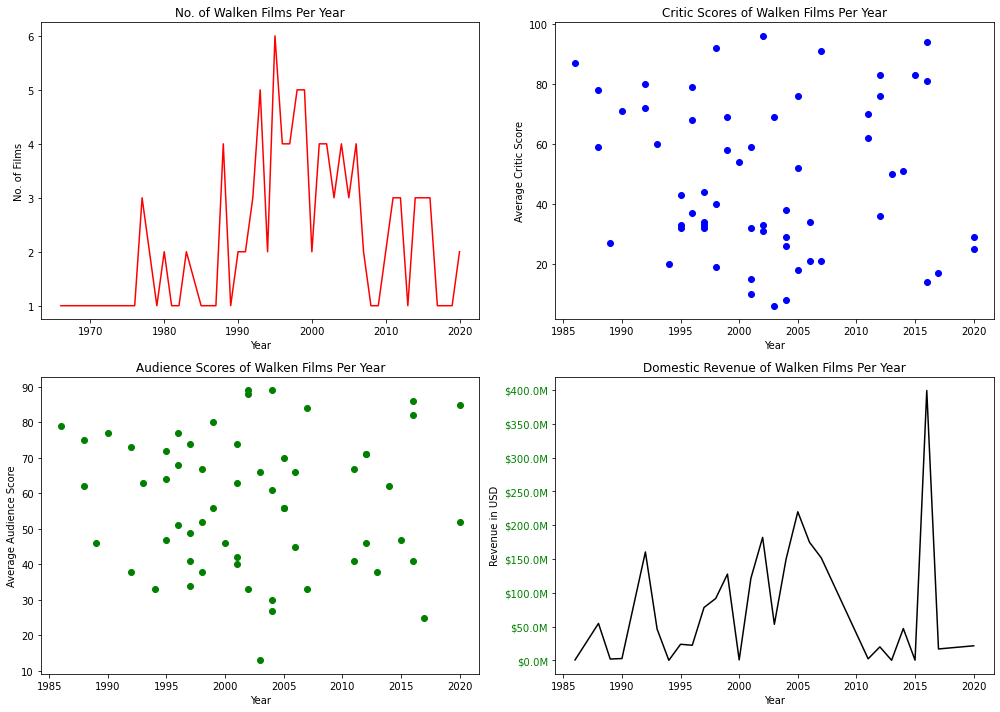

In [6]:
# Variable to shorten omitted NAs from columns
subset = ['Critics_Score', 'Audience_Score', 'box']

# Films per Year
x = year_sorted['Year'].unique()
y = year_sorted['Year'].value_counts().sort_index()

# Critic Scores
x2 = year_sorted.dropna(subset=subset).Year
y2 = (year_sorted.dropna(subset=subset).Critics_Score) * 100

# Audience Scores
x3 = year_sorted.dropna(subset=subset).Year
y3 = (year_sorted.dropna(subset=subset).Audience_Score) * 100

# Domestic Revenue
x4 = year_sorted.dropna(subset=subset).Year
y4 = year_sorted.dropna(subset=subset).year_sum


# Subplots layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(14)

# Title 
plt.title('Walken Film Data')

# Plot
ax1.set_title('No. of Walken Films Per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Films')
ax1.plot(x, y, 'r')

ax2.set_title('Critic Scores of Walken Films Per Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Critic Score')
ax2.plot(x2, y2, 'bo')

ax3.set_title('Audience Scores of Walken Films Per Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Audience Score')
ax3.plot(x3, y3, 'go')

ax4.set_title('Domestic Revenue of Walken Films Per Year')
ax4.set_xlabel('Year')
ax4.set_ylabel('Revenue in USD')
ax4.plot(x4, y4, 'k')


# Y ticks
def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

ax4.yaxis.set_major_formatter(millions)
ax4.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)

fig.tight_layout()
plt.show()

## Cowbell Songs

### Get Data from UltimateCowbell.com

In [7]:
# Import CSV of all cowbell songs
songs = pd.read_csv('./csv/cowbell1_4247.csv')


# Remove extra quote in string
songs['Song'] = songs['Song'].str.replace('"', '')
songs['Band'] = songs['Band'].str.replace('"', '')


# Exclude songs without a year
songs = songs.loc[songs["Year"] != 0]
songs = songs.loc[songs["Year"] != 'nan']

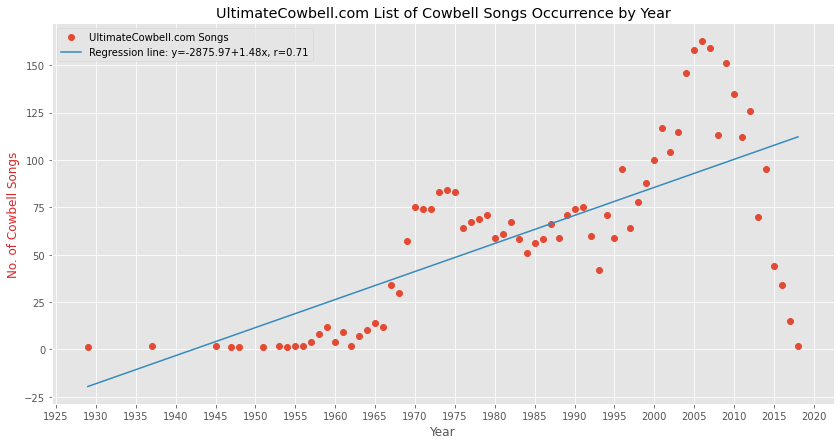

In [37]:
# Sort UltimateCowbell.com songs by year
year_songs = songs.sort_values(by='Year', ascending=True) 


# Define X and Y
# Cowbell songs by year / count
x = year_songs['Year'].dropna().unique()
y = year_songs['Year'].dropna().value_counts().sort_index()


# Regression Line
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'


# Set Fig and Subplots
fig, ax1 = plt.subplots()


# Figure Size
fig.set_figheight(7)
fig.set_figwidth(14)


# Title 
plt.title('UltimateCowbell.com List of Cowbell Songs Occurrence by Year')


# X and Y Labels
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cowbell Songs', color=color)


# Plot
ax1.plot(x, y, 'o', label='UltimateCowbell.com Songs')


# Set X ticks 
xticks = np.arange(1910, 2030, 5)
ax1.set_xticks(xticks)


# Plot
ax1.plot(x, intercept + slope * x, label=line)


# Legend and show 
plt.legend()
plt.show()

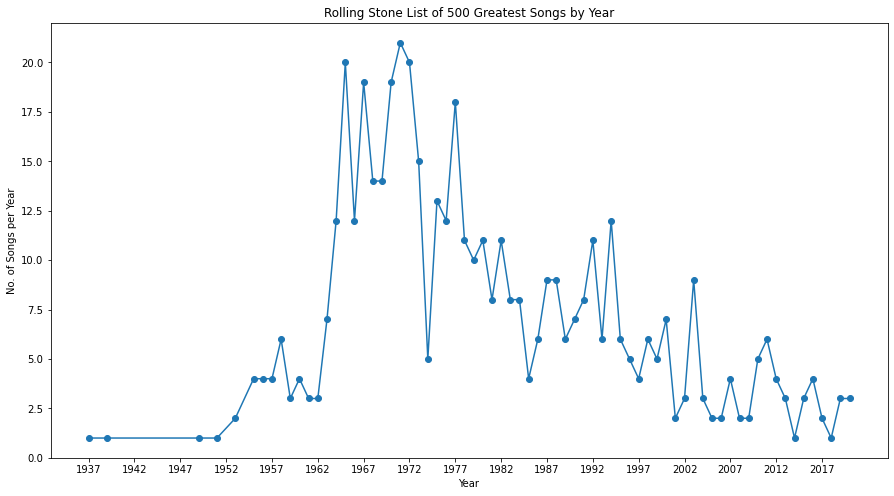

In [9]:
# Import Rolling Stone's Top 500 list
rs500 = pd.read_csv('./csv/rs500.csv')


# Sort by year
year_500 = rs500.sort_values(by='year', ascending=True) 


# Adjust size
plt.figure(figsize=(15,8))


# Define X and Y
x = year_500['year'].unique()
y = year_500['year'].value_counts().sort_index()


# Title 
plt.title('Rolling Stone List of 500 Greatest Songs by Year')


# X and Y Axis Labels
plt.xlabel('Year')
plt.ylabel('No. of Songs per Year') 


# X Ticks- Every five years
plt.xticks(np.arange(min(x), max(x)+1, 5.0))


# Plot the graph
plt.plot(x, y, marker='o')

plt.show()

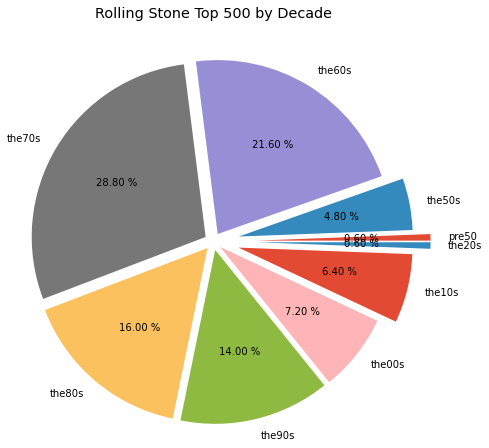

144


In [10]:
# Change default colors
plt.style.use('ggplot')


# Songs by decade
pre50 = year_500.loc[year_500['year'] < 1950].count()[0]
the50s = year_500.loc[(year_500['year'] >= 1950) & (year_500['year'] < 1960)].count()[0]
the60s = year_500.loc[(year_500['year'] >= 1960) & (year_500['year'] < 1970)].count()[0]
the70s = year_500.loc[(year_500['year'] >= 1970) & (year_500['year'] < 1980)].count()[0]
the80s = year_500.loc[(year_500['year'] >= 1980) & (year_500['year'] < 1990)].count()[0]
the90s = year_500.loc[(year_500['year'] >= 1990) & (year_500['year'] < 2000)].count()[0]
the00s = year_500.loc[(year_500['year'] >= 2000) & (year_500['year'] < 2010)].count()[0]
the10s = year_500.loc[(year_500['year'] >= 2010) & (year_500['year'] < 2020)].count()[0]
the20s = year_500.loc[(year_500['year'] >= 2020) & (year_500['year'] < 2030)].count()[0]


decades = [pre50, the50s, the60s, the70s, the80s, the90s, the00s, the10s, the20s]
labels = ['pre50', 'the50s', 'the60s', 'the70s', 'the80s', 'the90s','the00s','the10s','the20s']

plt.title('Rolling Stone Top 500 by Decade', y=1.5)

explode = (.5, .3, .1, .1, .1, .1, .1, .3, .5)
plt.pie(decades, labels=labels, explode=explode, autopct='%.2f %%', radius=2)
plt.show()

print(the70s)

In [11]:
print(rs500.song[60])

rs500['song'] = rs500['song'].str.replace(r"[\"\',']", "")
songs['Song'] = songs['Song'].str.replace(r"[\"\',']", "")
print(rs500.song[60])

print(songs.Song[442])
print(rs500.song[51])


If I Ain't Got You'
If I Aint Got You
(Dont Fear) The Reaper
(Dont Fear) The Reaper


C:\Users\annee\AppData\Local\Temp/ipykernel_18944/1333973672.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  rs500['song'] = rs500['song'].str.replace(r"[\"\',']", "")
C:\Users\annee\AppData\Local\Temp/ipykernel_18944/1333973672.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  songs['Song'] = songs['Song'].str.replace(r"[\"\',']", "")


In [12]:
# Find songs that are in both CSVs
combo = rs500[rs500['song'].isin(songs.Song)].sort_values(by='artist', ascending=True) 


# Make a new df
newlist = pd.DataFrame(data=combo, columns=['artist', 'song', 'year'])

In [13]:
# Read CSV
extrabell = pd.read_csv('./csv/extra_cowbell.csv')


# Make final df of cowbell songs
frames = [newlist, extrabell]

final_list = pd.concat(frames)

final_list_year = final_list.sort_values(by='year', ascending=True) 

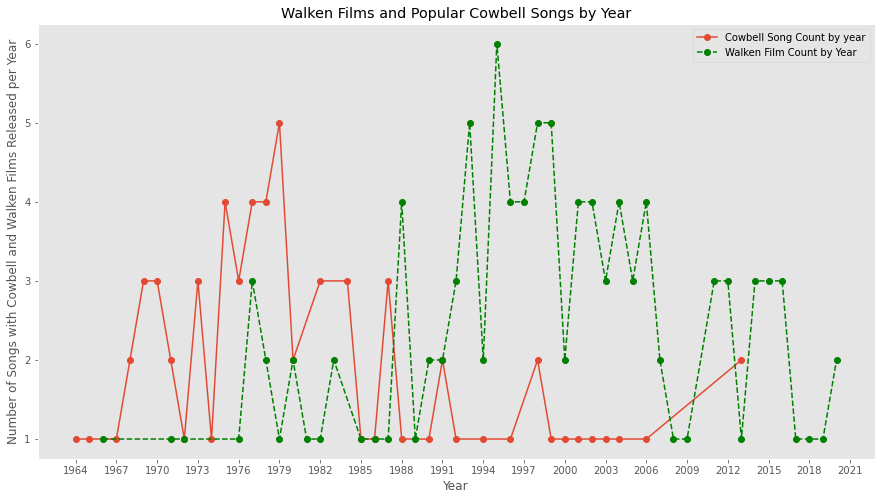

In [14]:
# Adjust size
plt.figure(figsize=(15,8))


# Define X and Y
# Cowbell songs by year / count
x = final_list_year['year'].unique()
y = final_list_year['year'].value_counts().sort_index()
# Walken films by year / count
x2 = year_sorted['Year'].unique()
y2 = year_sorted['Year'].value_counts().sort_index()


# Title 
plt.title('Walken Films and Popular Cowbell Songs by Year')


# X and Y Axis Labels
plt.xlabel('Year')
plt.ylabel('Number of Songs with Cowbell and Walken Films Released per Year') 


# X Ticks- Every three years
plt.xticks(np.arange(min(x), max(x)+10, 3.0))


# Plot the graph
plt.plot(x, y, marker='o', label = 'Cowbell Song Count by year')
plt.plot(x2, y2, 'g--o', label = 'Walken Film Count by Year')
plt.grid()
plt.legend()
plt.show()

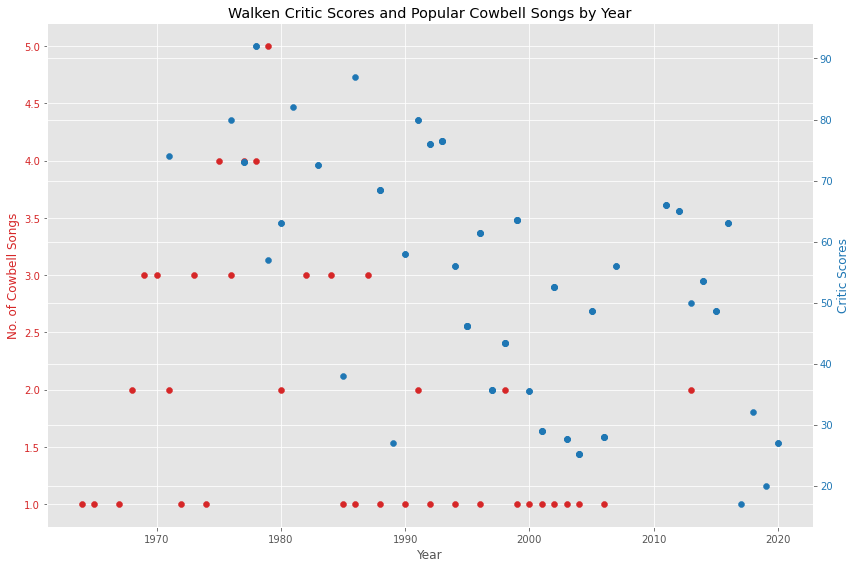

In [15]:
# Add movie revenue if in the same year
year_sorted['crit_avg'] = walken.groupby(['Year'])['Critics_Score'].transform(np.mean)

# Define X and Y
# Cowbell songs by year / count
x = final_list_year['year'].unique()
y = final_list_year['year'].value_counts().sort_index()
# Walken films by year / Critic Score
x2 = year_sorted.Year
y2 = year_sorted.crit_avg * 100

fig, ax1 = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(12)

# Title 
plt.title('Walken Critic Scores and Popular Cowbell Songs by Year')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cowbell Songs', color=color)
ax1.scatter(x, y, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Critic Scores', color=color)  # we already handled the x-label with ax1
ax2.scatter(x2, y2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

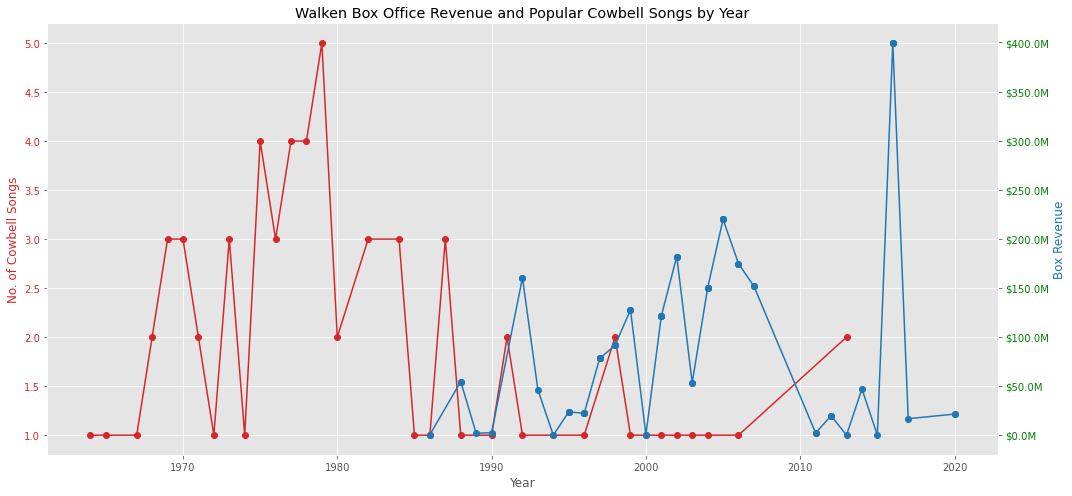

In [16]:
# Define X and Y
# Cowbell songs by year / count
x = final_list_year['year'].unique()
y = final_list_year['year'].value_counts().sort_index()

# Walken films by Domestic Revenue
x2 = year_sorted.dropna(subset=subset).Year
y2 = year_sorted.dropna(subset=subset).year_sum


fig, ax1 = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(15)

# Title 
plt.title('Walken Box Office Revenue and Popular Cowbell Songs by Year')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cowbell Songs', color=color)
ax1.plot(x, y, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, )

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Box Revenue', color=color)  # we already handled the x-label with ax1
ax2.plot(x2, y2, '-o', color=color)


# Y ticks
def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

ax2.yaxis.set_major_formatter(millions)
ax2.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

fig.tight_layout()
plt.grid()
plt.show()


# CONCLUSION